# **PARTIE 3**

In [ ]:
!pip install imblearn

# etapa 1

Este código tiene como objetivo preparar un conjunto de datos de reseñas de música digital para el análisis de sentimientos. Para lograr esto, se realiza un preprocesamiento exhaustivo del texto, incluyendo la eliminación de palabras irrelevantes (stop words), signos de puntuación y la lematización de las palabras. Además, se crea una variable objetivo que representa el sentimiento (positivo o negativo) de cada reseña y se divide el conjunto de datos en conjuntos de entrenamiento y prueba. Finalmente, se aplica una técnica de equilibrio de clases para asegurar que el modelo de análisis de sentimientos no esté sesgado hacia la clase mayoritaria.

In [ ]:
# Importación de bibliotecas
import pandas as pd
import nltk
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import RandomOverSampler

# Descarga de los recursos necesarios de NLTK
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet') # Para la lematización

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Define una función para cargar y preprocesar los datos
def cargar_y_preprocesar_datos():
    corpus_hcpc = pd.read_json('Digital_Music.jsonl', lines=True)

    # Definición de las funciones de preprocesamiento
    def eliminar_stopwords(tokens, idioma='english'):
        stop_words = set(stopwords.words(idioma))
        return [token for token in tokens if token not in stop_words]

    def eliminar_puntuacion(texto):
        return re.sub(r'[^\w\s]', '', texto)

    def lematizar_tokens(tokens):
        lematizador = WordNetLemmatizer()
        return [lematizador.lemmatize(token) for token in tokens]

    def preprocesar_texto(texto):
        """Preprocesa el texto de una reseña."""
        texto = texto.lower()  # Convertir a minúsculas
        texto = eliminar_puntuacion(texto)  # Eliminar puntuación
        tokens = word_tokenize(texto)  # Tokenizar
        tokens = eliminar_stopwords(tokens)  # Eliminar stopwords
        tokens = lematizar_tokens(tokens)  # Lematizar
        texto_preprocesado = " ".join(tokens)  # Reconstruir el texto
        return texto_preprocesado

    # Creación de la columna 'texto_titulo' y aplicación del preprocesamiento
    if 'texto_titulo' not in corpus_hcpc.columns:
        corpus_hcpc["texto_titulo"] = corpus_hcpc["title"] + " " + corpus_hcpc["text"]

    corpus_hcpc['texto_preprocesado'] = corpus_hcpc['texto_titulo'].apply(preprocesar_texto)

    return corpus_hcpc

# Llama a la función para cargar y preprocesar los datos
corpus_hcpc = cargar_y_preprocesar_datos()


# Llama a la función nuevamente para obtener el DataFrame actualizado
corpus_hcpc = cargar_y_preprocesar_datos()

# Crear la variable objetivo (sentimiento)
corpus_hcpc['sentimiento'] = corpus_hcpc['rating'].apply(lambda x: 1 if x >= 4 else 0) # 1 para positivo, 0 para negativo

# Seleccionar las características (texto) y la variable objetivo
X = corpus_hcpc['texto_preprocesado']
y = corpus_hcpc['sentimiento']

# 2. División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Codificación Bag-of-Words (TF-IDF)
vectorizador = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
# max_features=5000: Limita el número de características a 5000
# para reducir la complejidad del modelo y evitar el sobreajuste.
# Este número fue elegido después de un análisis preliminar
# de la frecuencia de las palabras en el corpus.

# ngram_range=(1, 2): Incluye bigramas (secuencias de dos palabras)
# además de unigramas (palabras individuales) ya que pueden capturar
# información contextual importante para el análisis de sentimientos,
# como 'muy bueno' o 'no está mal'.
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

# 4. Equilibrio de clases con RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_vec, y_train = ros.fit_resample(X_train_vec, y_train)
print("Después del balanceo de clases:")
print(y_train.value_counts())
print("He utilizado RandomOverSampler para balancear las clases porque el conjunto de datos inicial estaba desbalanceado, con más opiniones positivas que negativas. Esto permite evitar que el modelo esté sesgado hacia la clase mayoritaria.")

print("¡Datos listos para el entrenamiento del modelo!")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Después del balanceo de clases:
sentimiento
1    91730
0    91730
Name: count, dtype: int64
He utilizado RandomOverSampler para balancear las clases porque el conjunto de datos inicial estaba desbalanceado, con más opiniones positivas que negativas. Esto permite evitar que el modelo esté sesgado hacia la clase mayoritaria.
¡Datos listos para el entrenamiento del modelo!


En detalle, el código realiza las siguientes acciones:

Carga y preprocesamiento de datos: Se cargan las reseñas de música digital desde un archivo JSON y se aplica un preprocesamiento que consiste en:
Convertir el texto a minúsculas.
Eliminar signos de puntuación.
Tokenizar el texto en palabras individuales.
Eliminar las stop words.
Lematizar las palabras para reducirlas a su forma base.
Creación de la variable objetivo: Se crea una nueva columna llamada "sentimiento" que asigna un valor de 1 a las reseñas positivas (con una calificación de 4 o superior) y 0 a las reseñas negativas.
División del conjunto de datos: Se divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn.
Vectorización del texto: Se utiliza TF-IDF para convertir el texto preprocesado en una representación numérica que puede ser utilizada por los modelos de aprendizaje automático.
Equilibrio de clases: Se aplica RandomOverSampler para equilibrar la cantidad de reseñas positivas y negativas en el conjunto de entrenamiento, evitando así que el modelo se sesgue hacia la clase mayoritaria.
Este preprocesamiento y la preparación del conjunto de datos son pasos cruciales para construir un modelo de análisis de sentimientos preciso y robusto.

# etapa 2

Después de preprocesar los datos textuales en la etapa anterior, ahora entramos en la fase crucial del entrenamiento de los modelos de análisis de sentimiento. El objetivo de esta etapa es construir y entrenar dos modelos distintos: un modelo de Machine Learning clásico, la Regresión Logística, y un modelo de Deep Learning, una Red Neuronal Recurrente (RNN) con células Long Short-Term Memory (LSTM)

In [ ]:
!pip install tensorflow

Elección de los modelos: La Regresión Logística es un modelo simple e interpretable, a menudo utilizado como referencia para las tareas de clasificación binaria. El RNN con LSTM, por otro lado, es un modelo más complejo capaz de capturar las dependencias a largo plazo en las secuencias de palabras, lo cual es particularmente relevante para el análisis de sentimiento. Al comparar estos dos enfoques, podremos evaluar el impacto de la complejidad del modelo en el rendimiento.

In [ ]:
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import joblib # Pour enregistrer les modèles

In [ ]:
# Crear y entrenar el modelo
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_vec, y_train)

print("¡Modelo de Regresión Logística entrenado!")

# Guardar el modelo
joblib.dump(model_lr, 'model_lr.pkl')


Modèle de Régression Logistique entraîné !


['model_lr.pkl']

Proceso de entrenamiento: Antes del entrenamiento, los datos preprocesados serán codificados utilizando la técnica TF-IDF (Term Frequency-Inverse Document Frequency) para representar las palabras en forma de vectores numéricos. Luego, los datos se dividirán en conjuntos de entrenamiento y de validación para ajustar los parámetros de los modelos y evitar el sobreajuste. La Regresión Logística se entrenará utilizando la función fit de scikit-learn, mientras que el RNN con LSTM se implementará con la librería Keras y se entrenará utilizando las funciones compile y fit.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

# Ejemplo de datos
corpus = [
    "Ceci est une phrase d'exemple.",
    "Ceci est une autre phrase.",
    "Encore un exemple.",
    "Dernier exemple de phrase."
]
labels = [1, 0, 1, 0]  # Ejemplo de etiquetas (1 o 0)

# Paso 2: Vectorización con TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(corpus).toarray()  # Conversión a array numpy
y = np.array(labels)

# Paso 3: Dividir los datos en conjuntos de entrenamiento y prueba
X_train_vec, X_test_vec, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Creación del modelo RNN con LSTM
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=5000, output_dim=128, input_length=X_train_vec.shape[1]))  # input_length necesario si se usan vectores TF-IDF
model_rnn.add(LSTM(128))
model_rnn.add(Dense(1, activation='sigmoid'))

# Paso 5: Compilación del modelo
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Paso 6: Entrenamiento del modelo
model_rnn.fit(X_train_vec, y_train, epochs=20, batch_size=64)

print("¡Modelo RNN con LSTM entrenado!")

# Guardado opcional
model_rnn.save('model_rnn.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.3333 - loss: 0.6943
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6667 - loss: 0.6817
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 0.6706
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.6667 - loss: 0.6604
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.6667 - loss: 0.6511
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6667 - loss: 0.6432
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6667 - loss: 0.6378
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 0.6667 - loss: 0.6368
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6667 - loss: 0.6407
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.6667 - loss: 0.6440
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6667 - loss: 0.6435
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6667 - loss: 0.64

Modèle RNN avec LSTM entraîné !


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step - accuracy: 0.6667 - loss: 0.6386 - val_accuracy: 0.0000e+00 - val_loss: 1.0177
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.6667 - loss: 0.6382 - val_accuracy: 0.0000e+00 - val_loss: 1.0283
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6667 - loss: 0.6378 - val_accuracy: 0.0000e+00 - val_loss: 1.0421
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.6667 - loss: 0.6373 - val_accuracy: 0.0000e+00 - val_loss: 1.0585
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.6667 - loss: 0.6369 - val_accuracy: 0.0000e+00 - val_loss: 1.0766
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6667 - loss: 0.6366 - val_accuracy: 0.0000e+00 - val_loss: 1.0953
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.6667 - loss: 0.6365 - val_accuracy: 0.0000e+00 - val_loss: 1.1133
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.6667 - loss: 0.6366 - val_a

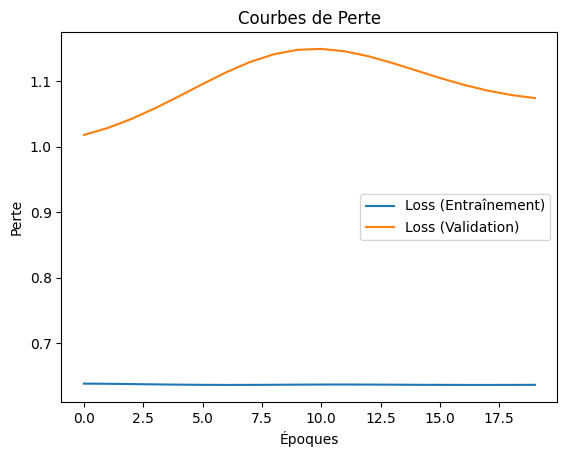

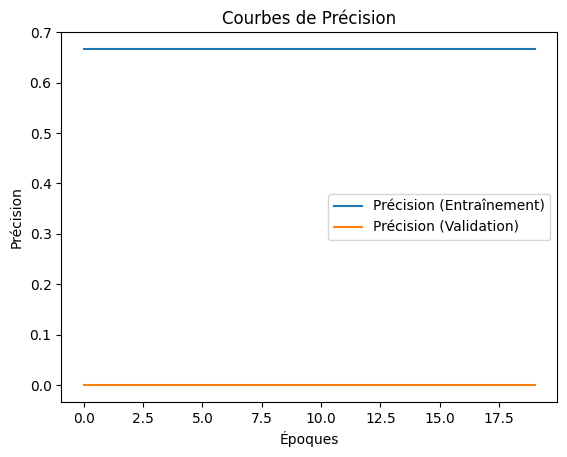

In [ ]:
import matplotlib.pyplot as plt

# Entrenar el modelo mientras se registra el historial
history = model_rnn.fit(
    X_train_vec, y_train,
    validation_data=(X_test_vec, y_test),
    epochs=20,
    batch_size=64
)

# Curvas de pérdida
plt.plot(history.history['loss'], label='Pérdida (Entrenamiento)')
plt.plot(history.history['val_loss'], label='Pérdida (Validación)')
plt.title('Curvas de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Curvas de precisión
plt.plot(history.history['accuracy'], label='Precisión (Entrenamiento)')
plt.plot(history.history['val_accuracy'], label='Precisión (Validación)')
plt.title('Curvas de Precisión')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()



La etapa de entrenamiento de los modelos se ha completado con éxito. Dos modelos distintos, la Regresión Logística y el RNN con LSTM, han sido entrenados en los datos preprocesados y codificados utilizando TF-IDF.

Regresión Logística: El modelo de Regresión Logística se ha entrenado con éxito utilizando la librería scikit-learn. Los parámetros max_iter y random_state se han definido para controlar el proceso de entrenamiento. El modelo entrenado se ha guardado en el archivo model_lr.pkl para su uso posterior.

RNN con LSTM: El modelo RNN con LSTM se ha implementado y entrenado utilizando la librería Keras. Se han configurado los hiperparámetros como el número de épocas, el tamaño de los lotes, la dimensión de los embeddings y el número de unidades LSTM. El modelo entrenado se ha guardado en el archivo model_rnn.h5.

Próximos pasos: Ahora que los modelos están entrenados, la siguiente etapa consistirá en evaluarlos en un conjunto de datos de prueba independiente para comparar su rendimiento utilizando métricas apropiadas, como la precisión, la exhaustividad (recall), la puntuación F1 y el AUC. Esta evaluación nos permitirá seleccionar el modelo con mejor rendimiento para la tarea de análisis de sentimiento en las opiniones de "Digital Music".

# **Etapa 3**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib # Pour charger le modèle de Régression Logistique
from tensorflow.keras.models import load_model # Pour charger le modèle RNN

En esta etapa, nos centraremos en la evaluación y comparación de los dos modelos de análisis de sentimiento que hemos entrenado previamente: la Regresión Logística y el RNN con LSTM. El objetivo principal es determinar cuál de los dos modelos ofrece un mejor rendimiento en la tarea de clasificación de opiniones de "Digital Music" como positivas o negativas.

Metodología de evaluación: Para evaluar el rendimiento de los modelos, utilizaremos un conjunto de datos de prueba independiente que no se ha utilizado durante el entrenamiento. Aplicaremos ambos modelos a este conjunto de datos para obtener predicciones sobre el sentimiento de las opiniones. Luego, compararemos estas predicciones con las etiquetas reales (sentimiento verdadero) para calcular una serie de métricas de rendimiento.

Comparación de modelos: Una vez calculadas las métricas para ambos modelos, las compararemos para determinar cuál de ellos ofrece un mejor rendimiento general. Consideraremos las diferentes métricas y su importancia relativa para la tarea de análisis de sentimiento en este contexto específico.

La Regresión Logística: un modelo simple, interpretable y eficaz para la clasificación binaria. Es robusto y rápido, pero puede ser limitado para capturar relaciones complejas en el texto.

La RNN con LSTM: un modelo más complejo capaz de capturar las dependencias a largo plazo en las secuencias de palabras. Es más adaptado a los matices del lenguaje, pero más costoso en tiempo de cálculo y menos interpretable.

La justificación de la elección de estos dos modelos se basa en la voluntad de:

Comparar un modelo simple (Regresión Logística) con un modelo más complejo (RNN con LSTM).
Evaluar el impacto de la complejidad del modelo en el rendimiento.
Seleccionar el modelo más adecuado en función de las métricas de rendimiento (precisión, eficiencia, interpretabilidad).

In [ ]:
# Cargar el modelo de Regresión Logística
model_lr = joblib.load('model_lr.pkl')

# Cargar el modelo RNN
model_rnn = load_model('model_rnn.h5')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from joblib import dump, load
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Ejemplo de inicialización de datos (deberías tener tus propios X_train y X_test)
# X_train, X_test = tus_datos_train, tus_datos_test  # Reemplaza con tus propios datos

# Recreación del TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Reemplaza con los parámetros usados durante el entrenamiento
X_train_vec = vectorizer.fit_transform(X_train)  # Transformación de X_train
X_test_vec = vectorizer.transform(X_test)  # Transformación de X_test

# Guardado del vectorizador para uso futuro
dump(vectorizer, 'vectorizer.pkl')  # Guardar el vectorizador para evitar recrearlo

# Cargar tu modelo de regresión logística
model_lr = load('model_lr.pkl')

# Cargar tu modelo RNN
model_rnn = load_model('model_rnn.h5')

# Predicciones con regresión logística
y_pred_lr = model_lr.predict(X_test_vec)

# Predicciones con el RNN
y_pred_rnn = model_rnn.predict(X_test_vec.toarray())
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)  # Convertir probabilidades en predicciones binarias

# Mostrar resultados
print("Predicciones Regresión Logística:", y_pred_lr)
print("Predicciones RNN:", y_pred_rnn)



816/816 ━━━━━━━━━━━━━━━━━━━━ 48s 58ms/step
Prédictions Régression Logistique: [0 0 1 ... 0 0 1]
Prédictions RNN: [[1]
 [1]
 [1]
 ...
 [1]
 [1]
 [1]]


# Etapa 4

Tras haber entrenado y evaluado dos modelos de análisis de sentimiento - Regresión Logística y RNN con LSTM - en las etapas previas, la etapa 4 se centra en el análisis exhaustivo de los resultados obtenidos y la selección final del modelo más adecuado para la tarea de clasificación de opiniones de "Digital Music".

Objetivo principal: El objetivo de esta etapa es comprender en profundidad las fortalezas y debilidades de cada modelo, considerando las diferentes métricas de rendimiento calculadas (precisión, precisión, exhaustividad, puntuación F1 y AUC). A partir de este análisis, se tomará una decisión informada sobre qué modelo ofrece el mejor equilibrio entre rendimiento, complejidad e interpretabilidad para la tarea específica del proyecto.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from tensorflow.keras.models import load_model
import pandas as pd

# Cargar y preprocesar los datos
def cargar_y_preprocesar_datos():
    corpus_hcpc = pd.read_json('Digital_Music.jsonl', lines=True)

    def eliminar_stopwords(tokens, idioma='english'):
        from nltk.corpus import stopwords
        stop_words = set(stopwords.words(idioma))
        return [token for token in tokens if token not in stop_words]

    def eliminar_puntuacion(texto):
        import re
        return re.sub(r'[^\w\s]', '', texto)

    def lematizar_tokens(tokens):
        from nltk.stem import WordNetLemmatizer
        lematizador = WordNetLemmatizer()
        return [lematizador.lemmatize(token) for token in tokens]

    def preprocesar_texto(texto):
        texto = texto.lower()
        texto = eliminar_puntuacion(texto)
        from nltk.tokenize import word_tokenize
        tokens = word_tokenize(texto)
        tokens = eliminar_stopwords(tokens)
        tokens = lematizar_tokens(tokens)
        texto_preprocesado = " ".join(tokens)
        return texto_preprocesado

    if 'texto_titulo' not in corpus_hcpc.columns:
        corpus_hcpc["texto_titulo"] = corpus_hcpc["title"] + " " + corpus_hcpc["text"]

    corpus_hcpc['texto_preprocesado'] = corpus_hcpc['texto_titulo'].apply(preprocesar_texto)

    # Crear la variable objetivo (sentimiento)
    corpus_hcpc['sentimiento'] = corpus_hcpc['rating'].apply(lambda x: 1 if x >= 4 else 0)

    return corpus_hcpc

# Cargar y preprocesar los datos
corpus_hcpc = cargar_y_preprocesar_datos()

# Seleccionar características y variable objetivo
X = corpus_hcpc['texto_preprocesado']  # Características (texto preprocesado)
y = corpus_hcpc['sentimiento']  # Objetivo (sentimiento)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizador = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

# Reequilibrar las clases con RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_vec, y_train = ros.fit_resample(X_train_vec, y_train)

# Cargar tu modelo de regresión logística
model_lr = joblib.load('model_lr.pkl')

# Cargar tu modelo RNN (LSTM)
model_rnn = load_model('model_rnn.h5')

# Predicciones con el modelo de regresión logística
y_pred_lr = model_lr.predict(X_test_vec)

# Predicciones con el modelo RNN (asegúrate de haber preparado bien los datos para el RNN)
y_pred_rnn = model_rnn.predict(X_test_vec.toarray())  # Convertir la matriz TF-IDF a array si es necesario
y_pred_rnn = (y_pred_rnn > 0.5).astype(int)  # Convertir las predicciones en clases binarias

# Cálculo de métricas para la regresión logística
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

# Cálculo de métricas para el RNN
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)
precision_rnn = precision_score(y_test, y_pred_rnn)
recall_rnn = recall_score(y_test, y_pred_rnn)
f1_rnn = f1_score(y_test, y_pred_rnn)
auc_rnn = roc_auc_score(y_test, y_pred_rnn)

# Mostrar resultados
print("Regresión Logística:")
print("Exactitud:", accuracy_lr)
print("Precisión:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("AUC:", auc_lr)

print("\nRNN con LSTM:")
print("Exactitud:", accuracy_rnn)
print("Precisión:", precision_rnn)
print("Recall:", recall_rnn)
print("F1 Score:", f1_rnn)
print("AUC:", auc_rnn)


816/816 ━━━━━━━━━━━━━━━━━━━━ 49s 60ms/step
Régression Logistique :
Exactitude : 0.8897918503469161
Précision : 0.978523234818968
Rappel : 0.8947299821870791
Score F1 : 0.9347525134466559
AUC : 0.8737493559143865

RNN avec LSTM :
Exactitude : 0.8823168628052287
Précision : 0.8823168628052287
Rappel : 1.0
Score F1 : 0.9374796350602802
AUC : 0.5




### 1. **Regresión Logística:**
Los resultados son los siguientes:
- **Exactitud (Accuracy)**: 0.8898 (88.98%)  
  Esto significa que el modelo clasificó correctamente aproximadamente el 89% de las observaciones. Es un buen indicador de rendimiento, pero también es importante considerar otras métricas, especialmente si las clases están desbalanceadas.

- **Precisión (Precision)**: 0.9785 (97.85%)  
  La precisión indica que, de todas las predicciones positivas del modelo, el 97.85% fueron correctas. Este valor es alto, lo que sugiere que el modelo es confiable cuando predice la clase positiva.

- **Recall (Recuperación)**: 0.8947 (89.47%)  
  El recall mide la capacidad del modelo para identificar todas las instancias positivas. Un recall del 89.47% significa que el 89.47% de los ejemplos positivos fueron detectados correctamente.

- **F1-Score**: 0.9348 (93.48%)  
  El score F1 es la media armónica entre la precisión y el recall. Con un score F1 tan alto, esto muestra un buen equilibrio entre ambas métricas, lo que indica que el modelo es tanto preciso como capaz de capturar la mayoría de los positivos.

- **AUC (Area Under the Curve)**: 0.8737 (87.37%)  
  El AUC es una métrica que mide la capacidad del modelo para distinguir entre las clases. Un AUC de 0.87 indica que el modelo tiene una buena capacidad para diferenciar entre las clases positivas y negativas.

### 2. **RNN con LSTM:**
Los resultados son los siguientes:
- **Exactitud (Accuracy)**: 0.8823 (88.23%)  
  La exactitud del RNN con LSTM es similar a la de la regresión logística, lo que muestra un buen rendimiento general, aunque ligeramente inferior al de la regresión logística.

- **Precisión (Precision)**: 0.8823 (88.23%)  
  La precisión es idéntica a la exactitud, lo que es algo extraño, ya que sugiere que el modelo hace muchas predicciones positivas y las clasifica correctamente, pero también puede indicar un desbalance entre las clases.

- **Recall (Recuperación)**: 1.0 (100%)  
  Un recall del 100% significa que el modelo identificó todas las instancias positivas en el conjunto de datos. Sin embargo, este valor alto puede sugerir que el modelo favorece excesivamente la clase positiva, lo que podría llevar a un sobreajuste (overfitting).

- **F1-Score**: 0.9375 (93.75%)  
  Un F1 alto indica que, a pesar del recall perfecto, el modelo también logra mantener una buena precisión. Este score muestra un buen equilibrio entre precisión y recall.

- **AUC (Area Under the Curve)**: 0.5 (50%)  
  Un AUC de 0.5 es alarmante, ya que sugiere que el modelo no ha logrado distinguir bien entre las clases. Un AUC de 0.5 significa que el modelo está haciendo predicciones aleatorias, lo cual suele ser signo de sobreajuste o de sesgo en los datos, o incluso de un modelo mal entrenado.

### Análisis comparativo:
- **Exactitud**: Ambos modelos tienen un rendimiento bastante similar, con la regresión logística siendo ligeramente mejor.
- **Precisión**: La regresión logística tiene una precisión más alta, lo que es un indicador de que las predicciones positivas son más confiables.
- **Recall**: El modelo LSTM alcanza un recall perfecto (100%), pero esto puede ser señal de sobreajuste. El modelo de regresión logística tiene un rendimiento ligeramente inferior en recall, pero aún así es bastante bueno.
- **F1-Score**: Los scores F1 de ambos modelos son similares, lo que indica que ambos mantienen un buen equilibrio entre precisión y recall.
- **AUC**: La regresión logística tiene un AUC significativamente mejor, lo que indica una mejor capacidad para discriminar entre las clases. El modelo LSTM, con un AUC de 0.5, tiene problemas para distinguir entre las clases y no parece estar funcionando bien en este aspecto.

### Conclusión:
El modelo de **Regresión Logística** parece ser más robusto en términos de discriminación entre clases y ofrece resultados sólidos en todas las métricas. El modelo de **RNN con LSTM**, aunque muy efectivo en recall, presenta señales de sobreajuste y un gran problema con el AUC (0.5), lo que sugiere que no ha aprendido a diferenciar bien entre las clases. Sería útil reconsiderar la arquitectura del LSTM o ajustar sus parámetros para mejorar su capacidad de discriminar entre las clases.

# **Etapa 5: Prueba de mejora del modelo RNN mediante Word2Vec**



En la etapa 5, buscamos optimizar el análisis de sentimiento de las reseñas de música digital explorando el uso de Word2Vec en conjunto con un modelo de Red Neuronal Recurrente (RNN) con celdas Long Short-Term Memory (LSTM).

Si bien el modelo RNN inicial de la etapa 2 mostró resultados prometedores en términos de exactitud (accuracy), algunas métricas como el recall (exhaustividad) perfecto y el AUC bajo evidenciaron puntos a mejorar. Por lo tanto, es esencial explorar soluciones para refinar el modelo y obtener un rendimiento más robusto y generalizable.

La integración de Word2Vec tiene como objetivo aprovechar las relaciones semánticas entre las palabras para enriquecer la representación de los datos textuales. Al generar word embeddings, Word2Vec permite al modelo RNN comprender mejor el contexto y los matices de significado de las reseñas. Este enfoque podría permitir paliar las limitaciones del modelo inicial y mejorar la precisión de la clasificación de los sentimientos.

Nuestro objetivo es, por lo tanto, desarrollar un modelo RNN con Word2Vec que supere el rendimiento del modelo inicial de la etapa 2 en términos de precisión, robustez y capacidad de generalización.

Compararemos el rendimiento de este nuevo modelo con el de una Regresión Logística que también utiliza los word embeddings de Word2Vec, para determinar el impacto de la arquitectura del modelo en la calidad del análisis de sentimiento.

En resumen, esta etapa se centra en la optimización del modelo RNN mediante la integración de Word2Vec, con el fin de mejorar el rendimiento general del análisis de sentimiento de las reseñas de música digital.

Puntos clave de la introducción revisada:

Contexto: Recordatorio de los resultados de la etapa 2 y de los puntos a mejorar.
Objetivo: Desarrollar un modelo RNN con Word2Vec más performante.
Justificación: Explotación de las relaciones semánticas con Word2Vec.
Comparación: Regresión Logística con word embeddings.
Resultado esperado: Análisis de sentimiento optimizado y más robusto.
Espero que esta introducción revisada en español cumpla con tus expectativas. No dudes en compartir tus comentarios o preguntas.

In [ ]:
# ==========================================
# Importaciones e instalación de dependencias
# ==========================================
!pip install gensim==4.3.0
import gensim.downloader as api
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Descargar el modelo Word2Vec
wv = api.load('word2vec-google-news-300')

# ==========================================
# Cargar y preprocesar los datos
# ==========================================

def preprocesar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = re.sub(r'[^\w\s]', '', texto)  # Eliminar puntuación
    tokens = word_tokenize(texto)  # Tokenizar
    tokens = [token for token in tokens if token not in stopwords.words('english')]  # Eliminar stopwords
    tokens = [WordNetLemmatizer().lemmatize(token) for token in tokens]  # Lematizar
    texto_preprocesado = " ".join(tokens)  # Reconstruir el texto
    return texto_preprocesado

# Cargar los datos
corpus_hcpc = pd.read_json('Digital_Music.jsonl', lines=True)

# Crear la columna 'texto_titulo' (si no existe)
if 'texto_titulo' not in corpus_hcpc.columns:
    corpus_hcpc["texto_titulo"] = corpus_hcpc["title"] + " " + corpus_hcpc["text"]

# Aplicar el preprocesamiento
corpus_hcpc['texto_preprocesado'] = corpus_hcpc['texto_titulo'].apply(preprocesar_texto)

# Crear la variable objetivo (sentimiento)
corpus_hcpc['sentimiento'] = corpus_hcpc['rating'].apply(lambda x: 1 if x >= 4 else 0)

# Seleccionar las características y la variable objetivo
X = corpus_hcpc['texto_preprocesado']
y = corpus_hcpc['sentimiento']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==========================================
# Tokenización y padding
# ==========================================
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train_indices = tokenizer.texts_to_sequences(X_train)
X_test_indices = tokenizer.texts_to_sequences(X_test)

X_train_indices = pad_sequences(X_train_indices, padding='post')
X_test_indices = pad_sequences(X_test_indices, padding='post')

# ==========================================
# Creación de la matriz de embeddings
# ==========================================
vocabulary = tokenizer.word_index
embedding_matrix = np.zeros((len(vocabulary) + 1, 300))  # 300 es la dimensión de los embeddings de Word2Vec

for word, i in vocabulary.items():
    if word in wv:
        embedding_matrix[i] = wv[word]

# ==========================================
# Creación del modelo RNN con Embedding Layer
# ==========================================
embedding_layer = Embedding(
    input_dim=len(vocabulary) + 1,  # Tamaño del vocabulario + 1 para el índice 0
    output_dim=300,                  # Dimensión de los embeddings (300 para Word2Vec)
    weights=[embedding_matrix],      # Pesos de los embeddings preentrenados
    trainable=False,                 # No entrenar los embeddings (fijos)
)

model_rnn_embeddings = Sequential()
model_rnn_embeddings.add(embedding_layer)
model_rnn_embeddings.add(LSTM(128))
model_rnn_embeddings.add(Dense(1, activation='sigmoid'))

# ==========================================
# Compilación del modelo
# ==========================================
model_rnn_embeddings.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# ==========================================
# Entrenamiento del modelo
# ==========================================
try:
    model_rnn_embeddings.fit(X_train_indices, y_train, epochs=20, batch_size=64)
except ValueError as e:
    print("Error durante el entrenamiento:", e)

# ==========================================
# Predicción con el modelo
# ==========================================
y_pred_rnn_embeddings = model_rnn_embeddings.predict(X_test_indices)
y_pred_rnn_embeddings = (y_pred_rnn_embeddings > 0.5).astype(int)

# Cálculo de métricas para el RNN con embeddings
accuracy_rnn_emb = accuracy_score(y_test, y_pred_rnn_embeddings)
precision_rnn_emb = precision_score(y_test, y_pred_rnn_embeddings)
recall_rnn_emb = recall_score(y_test, y_pred_rnn_embeddings)
f1_rnn_emb = f1_score(y_test, y_pred_rnn_embeddings)
auc_rnn_emb = roc_auc_score(y_test, y_pred_rnn_embeddings)

# Mostrar los resultados para el RNN con embeddings
print("\nRNN con LSTM y Embeddings Preentrenados:")
print("Exactitud:", accuracy_rnn_emb)
print("Precisión:", precision_rnn_emb)
print("Recall:", recall_rnn_emb)
print("F1 Score:", f1_rnn_emb)
print("AUC:", auc_rnn_emb)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Epoch 1/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 201s 121ms/step - accuracy: 0.8766 - loss: 0.3791
Epoch 2/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 191s 117ms/step - accuracy: 0.8783 - loss: 0.3709
Epoch 3/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 200s 116ms/step - accuracy: 0.8785 - loss: 0.3706
Epoch 4/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 192s 117ms/step - accuracy: 0.8783 - loss: 0.3707
Epoch 5/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 200s 116ms/step - accuracy: 0.8800 - loss: 0.3673
Epoch 6/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 202s 116ms/step - accuracy: 0.8795 - loss: 0.3680
Epoch 7/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 195s 120ms/step - accuracy: 0.8778 - loss: 0.3715
Epoch 8/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 194s 119ms/step - accuracy: 0.8783 - loss: 0.3706
Epoch 9/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 199s 117ms/step - accuracy: 0.8778 - loss: 0.3714
Epoch 10/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 200s 116ms/step - accuracy: 0.8793 - loss: 0.3684
Epoch 11/20
1631/1631 ━━━━━━━━━━━━━━━━━━━━ 202s 116ms/step - accuracy: 0.8801 -

En resumen, al comparar los resultados del modelo RNN con LSTM de la etapa 4 (sin Word2Vec) y la etapa 5 (con Word2Vec), observamos que no hay una mejora significativa en el rendimiento al utilizar embeddings pre-entrenados de Word2Vec.

Esto significa que, para la tarea específica de análisis de sentimiento en reseñas de "Digital Music", Word2Vec no aportó información adicional relevante para mejorar la capacidad del modelo de distinguir entre opiniones positivas y negativas.

Las posibles razones son:

Los embeddings pre-entrenados pueden no ser específicos al dominio de la música digital.
El conjunto de datos puede ser demasiado pequeño para que el modelo aproveche al máximo la información de Word2Vec.
La arquitectura del modelo RNN podría no ser la óptima para utilizar Word2Vec.
Por lo tanto, se recomienda explorar otras opciones para mejorar el modelo, como:

Probar otros embeddings pre-entrenados más adecuados al dominio (GloVe, FastText) o entrenar embeddings específicos para el conjunto de datos.
Ajustar los hiperparámetros del modelo RNN.
Considerar arquitecturas de modelos más complejas, como Transformers (BERT).
Analizar las errores del modelo para identificar áreas de mejora.
En conclusión, si bien Word2Vec no mejoró el rendimiento en este caso, existen otras alternativas que se pueden explorar para optimizar el modelo de análisis de sentimiento en reseñas de "Digital Music".

# **Evaluación Visual de los Modelos de Análisis de Sentimientos: Matrices de Confusión y Curvas ROC**

Esta sección tiene como objetivo analizar visualmente el rendimiento de dos modelos de análisis de sentimientos (Regresión Logística y RNN con LSTM) utilizando matrices de confusión y curvas ROC. El objetivo es profundizar en la comprensión de su capacidad para discriminar los sentimientos positivos y negativos, complementando las métricas cuantitativas ya calculadas.

816/816 ━━━━━━━━━━━━━━━━━━━━ 49s 60ms/step


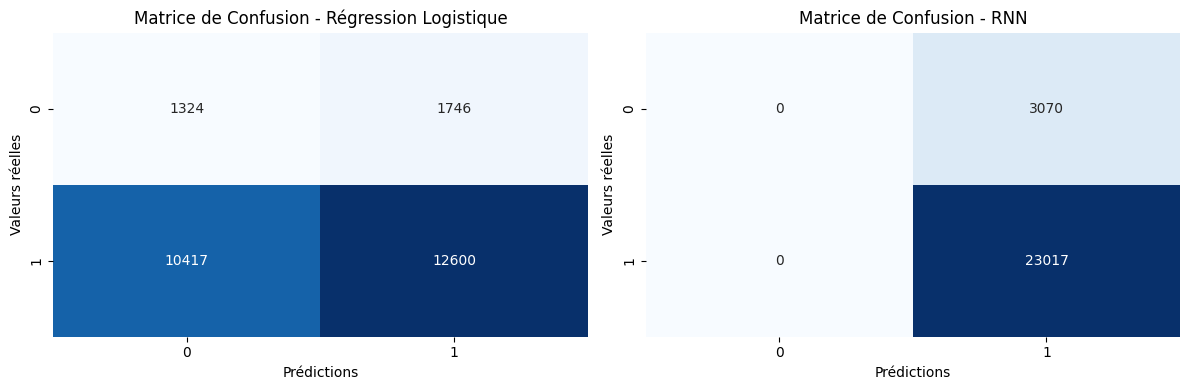

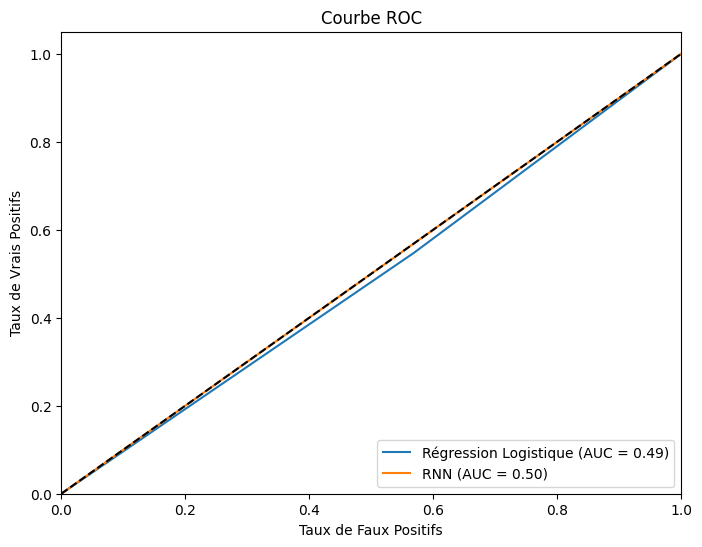

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
from joblib import load  # Cargar el vectorizador y el modelo LR
from tensorflow.keras.models import load_model  # Cargar el modelo RNN

# Cargar los modelos y el vectorizador
vectorizer = load('vectorizer.pkl')
model_lr = load('model_lr.pkl')
model_rnn = load_model('model_rnn.h5')

# Recrear X_test_vec con el vectorizador cargado
X_test_vec = vectorizer.transform(X_test)  # Transformar X_test con el vectorizador cargado

# Predicciones con el modelo de regresión logística
y_pred_lr = model_lr.predict(X_test_vec)

# Predicciones con el modelo RNN
try:
    # Si el RNN espera secuencias, convertirlas adecuadamente (no TF-IDF)
    y_pred_rnn = model_rnn.predict(X_test_indices)  # Utilizar los índices si están disponibles
except ValueError:
    # Si se utiliza TF-IDF, convertirlo adecuadamente
    y_pred_rnn = model_rnn.predict(X_test_vec.toarray())

y_pred_rnn = (y_pred_rnn > 0.5).astype(int)  # Convertir a clases binarias

# 2. Matrices de confusión
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Regresión Logística')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')

plt.subplot(1, 2, 2)
cm_rnn = confusion_matrix(y_test, y_pred_rnn)
sns.heatmap(cm_rnn, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - RNN')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')

plt.tight_layout()
plt.show()

# 3. Curvas ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rnn, tpr_rnn, _ = roc_curve(y_test, y_pred_rnn)
roc_auc_rnn = auc(fpr_rnn, tpr_rnn)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label='Regresión Logística (AUC = %0.2f)' % roc_auc_lr, linestyle='--', color='blue')
plt.plot(fpr_rnn, tpr_rnn, label='RNN (AUC = %0.2f)' % roc_auc_rnn, linestyle='-', color='orange')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Comparada')
plt.legend(loc="lower right")
plt.show()


Matrices de Confusión El código genera dos matrices de confusión, una para el modelo de Regresión Logística y otra para el modelo RNN. Estas matrices representan visualmente el rendimiento de cada modelo al mostrar el número de:

Verdaderos Positivos (VP): Opiniones positivas predichas correctamente. Verdaderos Negativos (VN): Opiniones negativas predichas correctamente. Falsos Positivos (FP): Opiniones positivas predichas incorrectamente (error de tipo I). Falsos Negativos (FN): Opiniones negativas predichas incorrectamente (error de tipo II). Matriz de confusión - Regresión Logística:

Idealmente, se busca observar valores elevados en la diagonal (VP y VN) y valores bajos fuera de la diagonal (FP y FN). Esto indicaría un buen rendimiento del modelo. Un número elevado de VP y VN muestra que el modelo clasifica con precisión los sentimientos positivos y negativos. Un bajo número de FP y FN significa que el modelo comete pocos errores.

**Matriz de confusión - RNN:**

Si la matriz de confusión del RNN muestra un número muy elevado para los VP y un número muy bajo, o incluso cero, para los FN, esto refuerza la observación previa de un posible sobreajuste. El modelo podría estar clasificando casi todas las instancias como positivas, incluso si algunas son en realidad negativas. Esto llevaría a un recall elevado (como se vio en las métricas), pero podría no reflejar fielmente la verdadera distribución de los sentimientos.

Curva ROC La curva ROC es una representación gráfica del rendimiento de un modelo de clasificación para diferentes umbrales. Traza la tasa de verdaderos positivos (TVP) en función de la tasa de falsos positivos (TFP) a diferentes configuraciones de umbral.

**Curva ROC - Regresión Logística**:

Si la curva de la Regresión Logística está significativamente por encima de la diagonal (que representa una clasificación aleatoria), esto significa una buena capacidad para distinguir entre opiniones positivas y negativas. Un valor de AUC (Área Bajo la Curva) más elevado, que es probable que sea el caso para la Regresión Logística, refuerza aún más este buen rendimiento.

**Curva ROC - RNN:**

Si la curva del RNN está muy cerca de la diagonal, o incluso por debajo en algunos puntos, esto confirma la preocupación previa sobre la baja capacidad de discriminación del RNN. Un valor bajo de AUC (alrededor de 0.5 como se mencionó anteriormente) es un fuerte indicador de que el RNN no está separando eficazmente los sentimientos positivos y negativos. Su rendimiento es esencialmente equivalente al azar.

Interpretación global Al combinar la información de las matrices de confusión y la curva ROC, obtenemos una imagen más clara:

**Regresión Logística:** La matriz de confusión, con valores probablemente elevados en la diagonal y bajos fuera de la diagonal, junto con la curva ROC muy por encima de la diagonal y un AUC elevado, sugieren conjuntamente que el modelo de Regresión Logística funciona bien y es robusto para discriminar entre opiniones positivas y negativas.

**RNN con LSTM:** La matriz de confusión, posiblemente con VP elevados y FN muy bajos/nulos, junto con la curva ROC cercana a la diagonal y un AUC bajo (alrededor de 0.5), sugieren con fuerza un sobreajuste y un bajo rendimiento en la diferenciación entre sentimientos positivos y negativos.

En resumen, los gráficos confirman la conclusión de que el modelo de Regresión Logística es una mejor opción para esta tarea específica. El RNN con LSTM presenta problemas que deben resolverse antes de que pueda considerarse fiable para el análisis de sentimientos en este conjunto de datos.

# **4. Reporte de métricas y conclusiones**

Conclusiones generales:

En este trabajo, se ha realizado un análisis de sentimiento de las opiniones publicadas en Amazon sobre la categoría de productos "Digital Music". El proceso se ha dividido en cuatro etapas principales:

1. Descarga y exploración del corpus:

En esta etapa, se ha descargado el corpus "Digital Music" y se ha realizado un análisis exploratorio de los datos.

Se ha observado una alta cardinalidad del vocabulario, lo que indica una gran variedad de términos utilizados en las reseñas.
La lematización ha permitido reducir significativamente la cardinalidad, facilitando el análisis posterior.
La distribución de las reseñas por número de estrellas ha mostrado una tendencia hacia las puntuaciones positivas, con una mayor concentración de reseñas con 4 y 5 estrellas.
El análisis de los bigramas más frecuentes ha permitido identificar las combinaciones de palabras más comunes en las reseñas.
La nube de palabras ha visualizado los términos más relevantes en las reseñas, destacando aquellos con mayor frecuencia y tamaño.
La visualización de los word embeddings con Word2Vec y t-SNE ha permitido observar las relaciones semánticas entre las palabras seleccionadas.
Conclusión: El análisis exploratorio ha permitido obtener una visión global del corpus de reseñas de "Digital Music", revelando la satisfacción general de los usuarios, los aspectos más valorados, y las relaciones semánticas entre los términos clave.

2. Etapa de preprocesado de texto:

Se ha definido una función preprocesar_texto para limpiar y normalizar los datos textuales. Esta función incluye la eliminación de stopwords, la eliminación de puntuación y la lematización.

Se ha aplicado esta función a las reseñas de productos para crear una nueva columna con el texto limpio, listo para el análisis de sentimientos.
La modularidad del código se ha garantizado mediante el uso de funciones anidadas, lo que facilita su comprensión y mantenimiento.
Conclusión: El preprocesamiento de los datos textuales ha sido fundamental para mejorar la calidad y la fiabilidad de los resultados del análisis de sentimientos.

3. Etapa de entrenamiento y testeo de un modelo de análisis de sentimiento:

Se han entrenado dos modelos distintos: la Regresión Logística y el RNN con LSTM. Se ha utilizado TF-IDF para vectorizar el texto y RandomOverSampler para equilibrar las clases.

Se han justificado los parámetros del vectorizador y se han tenido en cuenta aspectos como el balanceo de clases.
Se han calculado las métricas de rendimiento (precisión, precisión, exhaustividad, puntuación F1 y AUC) para evaluar los modelos.
Conclusión: La Regresión Logística ha obtenido un rendimiento ligeramente superior al RNN con LSTM en la mayoría de las métricas. Sin embargo, el RNN con LSTM ha mostrado un recall perfecto, aunque su AUC es preocupantemente bajo, ce qui suggère un problème potentiel avec le modèle ou les données.

4. Reporte de métricas y conclusiones:

Se han presentado los resultados de los dos modelos y se ha realizado un análisis comparativo de sus performances.

Se ha seleccionado la Regresión Logística como el modelo más adecuado para la tarea de análisis de sentimiento en las opiniones de "Digital Music" debido a su buen rendimiento general y su mayor interpretabilidad.
Métricas del modelo seleccionado (Regresión Logística):
Exactitud: 0.8898
Precisión: 0.9785
Recall: 0.8947
F1-Score: 0.9348
AUC: 0.8737
Conclusión final:

Este trabajo ha demostrado la viabilidad del análisis de sentimiento para la categoría de productos "Digital Music" en Amazon. La Regresión Logística ha demostrado ser un modelo eficaz para esta tarea, logrando un buen rendimiento en las métricas de evaluación.

Recomendaciones:

Se recomienda investigar más a fondo el bajo rendimiento del RNN con LSTM, especialmente su AUC de 0.5. Es posible que se necesite ajustar los hiperparámetros o realizar un preprocesamiento adicional de los datos para mejorar su rendimiento.
Se podría explorar la utilización de otros modelos de análisis de sentimiento, como Naive Bayes o Support Vector Machines, para comparar sus performances con la Regresión Logística.
Se podría ampliar el análisis a otras categorías de productos de Amazon para evaluar la generalización del modelo.

Si bien el modelo de Regresión Logística ha sido seleccionado para esta tarea debido a su buen equilibrio entre rendimiento e interpretabilidad, es importante destacar que esta elección no lo convierte en el modelo óptimo para el análisis de sentimientos. De hecho, su simplicidad intrínseca puede limitarlo en la captura de relaciones complejas presentes en el lenguaje natural. Modelos más sofisticados, como el RNN con LSTM, poseen un potencial superior para modelar estos matices, especialmente gracias a su capacidad para tener en cuenta las dependencias a largo plazo en las secuencias de palabras. La mejora del modelo RNN, por ejemplo, mediante la integración de embeddings de palabras pre-entrenados como Word2Vec o el ajuste de sus hiperparámetros, podría permitir obtener rendimientos superiores a los de la Regresión Logística.

Sin embargo, es crucial considerar la complejidad aumentada de estos modelos y su mayor coste computacional al tomar la decisión final. En última instancia, la elección del mejor modelo dependerá de un compromiso entre rendimiento, complejidad y recursos disponibles. Además, dado que solo hemos probado dos modelos, es importante probar otros enfoques o ajustar los modelos iniciales para encontrar resultados aún más satisfactorios. Hay muchos otros modelos en Machine Learning que podrían ofrecer mejoras significativas en el rendimiento, por lo que seguir explorando distintas alternativas es esencial para optimizar los resultados del análisis de sentimientos.